In [1]:
import sys
import os

# NOTE: The below import is useful to bring the local modules into the Python path!
module_path = os.path.abspath(os.path.join('../../..'))
print("module_path =", module_path, flush=True)

if module_path not in sys.path:
    sys.path.append(module_path)


module_path = /home/ari/Documents/Repos/tropical


In [2]:
import unittest
import wget
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
%reload_ext autoreload
%autoreload

from tropical.models import topic_modelling_corex


In [4]:
file_url = "https://storage.googleapis.com/io-feersum-vectors-nlu-prod/Extract_inbound_that_triggered_catchall_2020_04_20.csv?"\
"x-goog-signature=7a038d055fa6b6fd06384a84690deae8beda042450efbfd4935e23be843c624db6d34a573faa084a0539029d0f85dddedb6"\
"88c843ad0671fe6578da0b041675ed9f68b315dafd97da197dd44503096cce45cdd364592fc61df16f6be41f8c8268a537b40bb57a6ea2c61fa4"\
"381f3973222a57a5dbc38d82b1b0d91cbefb35024a173cbd726363dcdc8ba5b412de448b6309d5121eee470163c46750e92f93fc8b5e40750365"\
"184a337c927b72c8cf9cedef830ecc475fec72a594fdea869a5f683e131144ae37f6413d84c79605f485aeb8a999f989f718fe63d68f0c6b2984"\
"6f73ece8dac59a30cb68b9397947855f3caeb25aa41c1cba52d36f711c96fd031&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credentia"\
"l=gcp-storage%40feersum-221018.iam.gserviceaccount.com%2F20200818%2Fmulti%2Fstorage%2Fgoog4_request&x-goog-date=20200"\
"818T082034Z&x-goog-expires=604800&x-goog-signedheaders=host"


In [5]:
filename = wget.download(file_url)
print("filename =", filename)
df = pd.read_csv(filename)
os.remove(filename)

print(df.columns)
print(df.describe())
print(df.sample(n=5))


filename = Extract_inbound_that_triggered_catchall_2020_04_20.csv
Index(['day', 'uuid', 'content', 'rn'], dtype='object')
                 rn
count  20014.000000
mean    2497.760118
std     1444.404631
min        1.000000
25%     1247.000000
50%     2498.000000
75%     3748.750000
max     4999.000000
                    day                                  uuid  \
12706  2020-04-19 00:00  d8e1e041-00ee-5c43-7d3b-708d05f2dead   
5094   2020-04-18 00:00  d3d57d4b-2fc9-a8b6-6c0f-047b308e1eba   
10399  2020-04-19 00:00  b32ac988-ba6b-8534-16f2-d231062dfacf   
362    2020-04-17 00:00  6c6a9329-1bac-f7ef-d62a-51aadaad10c9   
10470  2020-04-19 00:00  dc0c5ff8-1645-9a5d-a81c-f51e14a59089   

                                                 content    rn  
12706                                             Causes  2691  
5094                                            1\nCases    78  
10399                                   What is Coved 19   384  
362                                            

In [6]:

analyser = topic_modelling_corex.TopicModellingCorex(n_topics=10)

In [8]:
result_frames = analyser.analyse_dataframe(df)

utterance_length_threshold = 231.0
There are 5 time frames
Working on Frame 2020-04-16 00:00
Vectorizing using TF-IDF
Vectorizing using TF-IDF
There are 5 time frames
Working on Frame 2020-04-17 00:00
Vectorizing using TF-IDF
Vectorizing using TF-IDF
There are 5 time frames
Working on Frame 2020-04-18 00:00
Vectorizing using TF-IDF
Vectorizing using TF-IDF
There are 5 time frames
Working on Frame 2020-04-19 00:00
Vectorizing using TF-IDF
Vectorizing using TF-IDF
There are 5 time frames
Working on Frame 2020-04-20 00:00
Vectorizing using TF-IDF
Vectorizing using TF-IDF


In [9]:
print(json.dumps(result_frames, indent=4, sort_keys=True, ensure_ascii=False))

          "fe9dfe72-a818-c885-bbb5-cbd4ac935544": {
                "content": "*more*",
                "processsed_content": "*more*",
                "rn": 4593,
                "time_frame": "2020-04-20 00:00",
                "topic_1": 0,
                "topic_10": 0,
                "topic_2": 0,
                "topic_3": 0,
                "topic_4": 0,
                "topic_5": 0,
                "topic_6": 0,
                "topic_7": 0,
                "topic_8": 0,
                "topic_9": 0,
                "utterance_length": 6
            },
            "febbc71f-c24d-81ec-95a8-5cb3b0608a5e": {
                "content": "1. English",
                "processsed_content": "1. english",
                "rn": 3498,
                "time_frame": "2020-04-20 00:00",
                "topic_1": 0,
                "topic_10": 0,
                "topic_2": 0,
                "topic_3": 0,
                "topic_4": 0,
                "topic_5": 0,
                "topic_6"

# Plot the Results

In [10]:
df.head()

,time_frame,uuid,content,rn,utterance_length
0,one_time_frame_to_rule_them_all,b2470cae-9c24-9340-8085-92223ecc2df4,Oryt Corona,1,11
1,one_time_frame_to_rule_them_all,562f2709-67d3-e023-bec0-12b52b256e00,🤔🤔🤔???,2,6
2,one_time_frame_to_rule_them_all,de297728-85db-cdd5-75ca-04d5b02a092c,Corona,3,6
3,one_time_frame_to_rule_them_all,faf176f7-ee13-f862-db3e-c8f03cf187f6,Case,4,4
4,one_time_frame_to_rule_them_all,a776a123-ac0b-9c73-247d-0c084fde52f9,Dcxfftcfccygggg 🦄🐈🦄🐒🦄🐎🐈🐈🐈🐒🐒🐱🐎⛑️🐶c🌶️,5,35


In [11]:
frame_idx = 0

result_frame = result_frames[frame_idx]

print('time_frame:', result_frame['time_frame'])

top_phrases = result_frame['top_phrases']
print('num top_phrases:', len(top_phrases))
print()

print('top_phrases[0] =', top_phrases[0])

time_frame: one_time_frame_to_rule_them_all
num top_phrases: 80

top_phrases[0] = {'phrase': 's', 'num_tokens': 1, 'importance': 0.058351870053282295, 'num_utterances': 954, 'num_utterances_percentage': 4.863872743958397, 'utterances': ['28add4b4-bd6f-996d-8505-3e8329ed2404', '4bec08cf-cf6a-ed24-8544-3b6eaec2eb02', '78bbe386-8b42-47af-e6d1-6d237ad133d7', 'da7219f2-e66d-93dd-3e98-b6e207f6c96e', '8a9f2ee0-1827-4105-b719-f4bfd5000e02', 'ea456907-e2f5-debe-6513-1b6dceb57db9', '78537a4f-6139-dc12-f65b-21dcba87f840', '7b1b74c8-dcaf-aea8-50f1-5b52874c7b2d', 'fc1d9f38-e8a2-83eb-46bd-6a3920104891', '4fc2fd52-a959-95ca-083e-de520f056131', '4853f50c-1849-4c7b-ad7d-18b0a84e648f', '9bb21fcd-988e-9bb8-1b5e-72d61c80f90e', '62982c4f-3824-e26f-eca3-91aa5eb673bc', '4e0d8625-824c-e1c9-1dcc-647715184452', '210a8e3e-e2c8-2ce0-d078-0fba929fb72b', 'da75511e-9a5b-d47e-d2be-6d2fdadf1fe1', 'e82445c3-10ac-372e-5bed-55606f4327ed', '607b3eb0-93d7-cb74-528d-7f4c6b2e51c6', '4dc27552-076e-5e6c-714e-4f623abf5e44', 'af

In [12]:
for phrase in top_phrases:
    num_tokens = phrase['num_tokens']
    
    if num_tokens == 2:  # 1,2,3, etc.
        print(phrase['phrase'], phrase['num_utterances'], phrase['importance'])

▁🗓|️ 615 0.03181418447053955
▁how|▁many 347 0.018260824582277173
'|s 272 0.014484506750814754
▁covid|▁19 240 0.01241529150069836
▁corona|▁virus 173 0.00900108633800631
▁covid|-19 121 0.006311106512855
'|m 97 0.005431690031555533
▁latest|▁news 103 0.0053282292690497125
▁1|▁news 82 0.004241891262738606
▁covid|19 80 0.004138430500232787
▁good|▁morning 77 0.004034969737726967
▁eastern|▁cape 77 0.003983239356474057
▁number|▁of 70 0.0038797785939682374
▁thank|▁you 73 0.003776317831462418
▁i|▁need 69 0.003672857068956598
▁food|▁parcel 69 0.0035693963064507787
▁main|▁menu 62 0.00320728363768041
▁https|:// 57 0.0029486317314158603
▁food|▁parcels 54 0.002793440587657131
▁i|▁want 52 0.002741710206404221


/Users/bduvenhage/myWork/dev/Praekelt/turn_tropical/.pyenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bduvenhage/myWork/dev/Praekelt/turn_tropical/.pyenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bduvenhage/myWork/dev/Praekelt/turn_tropical/.pyenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bduvenhage/myWork/dev/Praekelt/turn_tropical/.pyenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bduvenhage/myWork/dev/Praekelt/turn_tropical/.pyenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.p

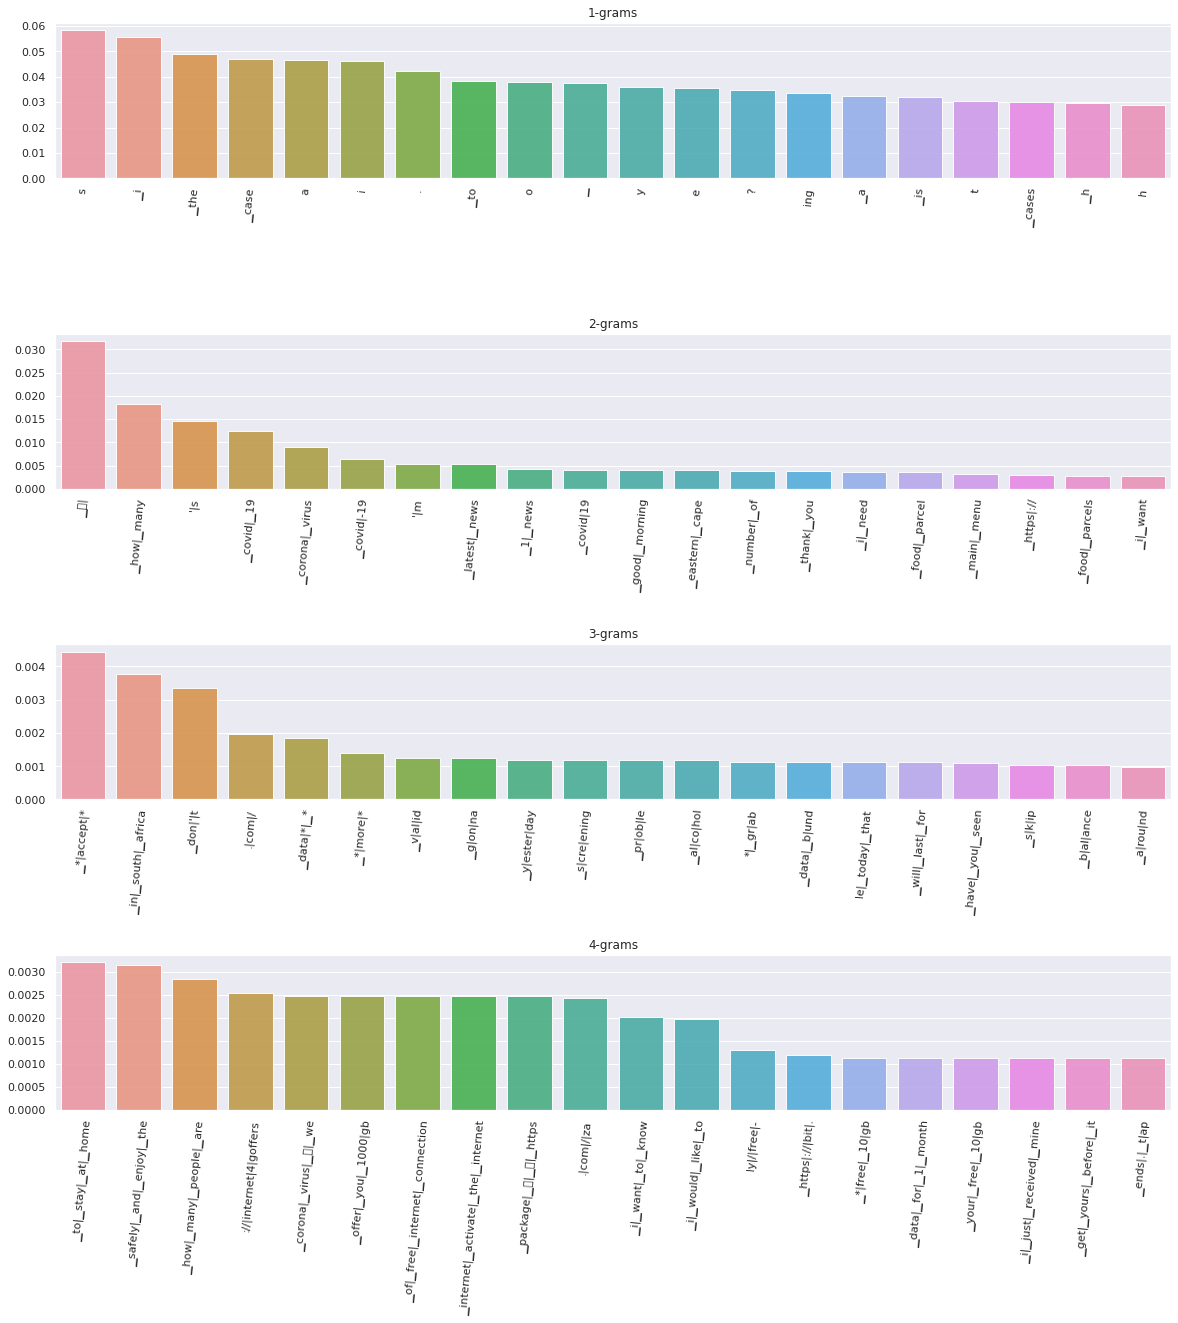

In [13]:
n = 4

sns.set(font="DejaVu Sans")  # The default matplotlib font; Seaborn would otherwise override it.
fig, axs = plt.subplots(n, figsize=(20,20));

for i in range(n):    
    phrase_list, importance_list = [],[];

    for phrase in top_phrases:
        num_tokens = phrase['num_tokens']
        
        if num_tokens == i+1:
            # print(phrase['phrase'], phrase['num_utterances'], phrase['importance'])
            phrase_list.append(phrase['phrase'])
            importance_list.append(phrase['importance'])
            # importance_list.append(phrase['num_utterances'])

    if len(phrase_list):
        sns.set(style="darkgrid");
        sns.barplot(phrase_list, importance_list, label="TOTAL", alpha=0.9, ax=axs[i]);
        axs[i].set_xticklabels(rotation=85, labels = phrase_list);
        axs[i].set_title(f"{i+1}-grams");

plt.subplots_adjust(hspace=1.0)
plt.show() ;

# plt.savefig("... .png");